In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1) Output Scaling Study

There are two types of output scaling:

- Normal outscaling: Here, each expectation value (which is between -1 and 1) is multiplied by a classical trainable weight.
- Skolik Outscaling: Here, each expectation value is first normalized to be between 0 and 1, and then multiplied by a classical trainable weight.

To study the difference in performance between these two types of output scaling, we trained 10 models each with the following specifications:
- Set of optimal hyperparameters as described in Skolik's paper.
- Continuous Input Encoding
- Input Scaling
- V2 Data Re-uploading
- All of the models were ran for 3000 episodes each, without early stopping.
- Once a model reached an average return of 195 or more over the last 25 episodes, it wouldn't be trained any further.
- Each model was composed of 4 qubits and 5 layers.
- Every model used the observables used in skolik's paper.

In [2]:
# Let's start by loading the data

normal_outscaling_models = []
skolik_outscaling_models = []

normal_path = "Results/outscaling_type_v2/normal/"
skolik_path = "Results/outscaling_type_v2/skolik/"

for i in range(1,11):
    with open(f"Results/continuous/skolik_arch/schuld_datareup/localexpectation_outscaling/ZZ_obs/skolik_optimal_hyper/agent{i}.pkl", "rb") as f:
        normal_outscaling_models.append(pickle.load(f))

for i in range(1,11):
    with open(f"Results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/agent{i}.pkl", "rb") as f:
        skolik_outscaling_models.append(pickle.load(f))

## 1.1) Analysis of the Performance using a Moving Average of the last 10 rewards

[]

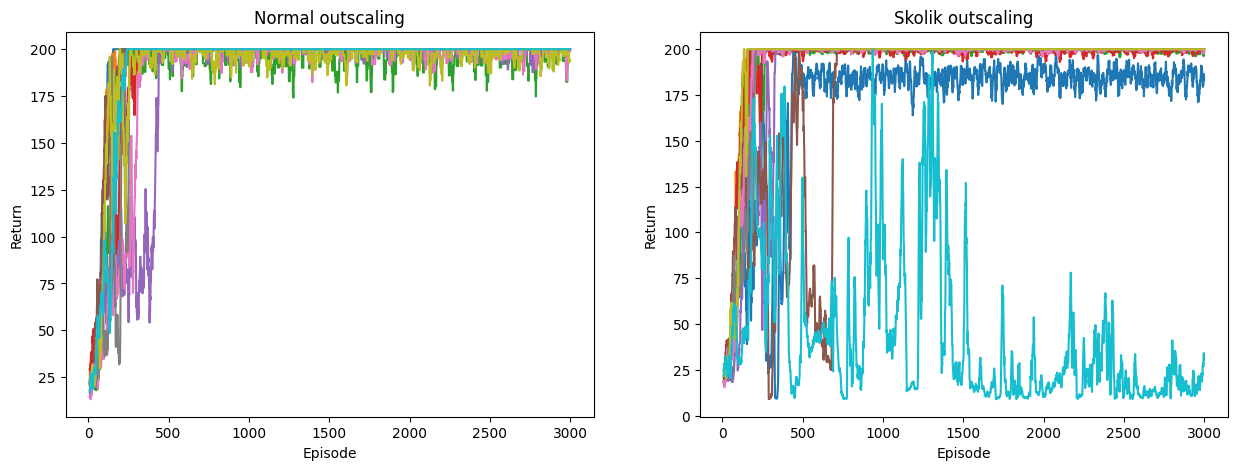

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(10):
    axs[0].plot(pd.Series(normal_outscaling_models[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
    axs[1].plot(pd.Series(skolik_outscaling_models[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")

axs[0].set_title("Normal outscaling")
axs[1].set_title("Skolik outscaling")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Return")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Return")

plt.plot()

It's very difficult to understand the performance of each type of output scaling from the moving averages, because there are too many agents. So, we will instead average the rewards over the 10 agents, and plot the average reward over time.

## 1.2) Analysis of the performance using the average reward

In [4]:
normal_outscaling_models_average_reward = []
skolik_outscaling_models_average_reward = []
aux_normal = []
aux_skolik = []

for j in range(3000):
    for i in range(10):
        aux_normal.append(normal_outscaling_models[i]["episode_reward_history"][j])
        aux_skolik.append(skolik_outscaling_models[i]["episode_reward_history"][j])
    normal_outscaling_models_average_reward.append(np.mean(aux_normal))
    skolik_outscaling_models_average_reward.append(np.mean(aux_skolik))

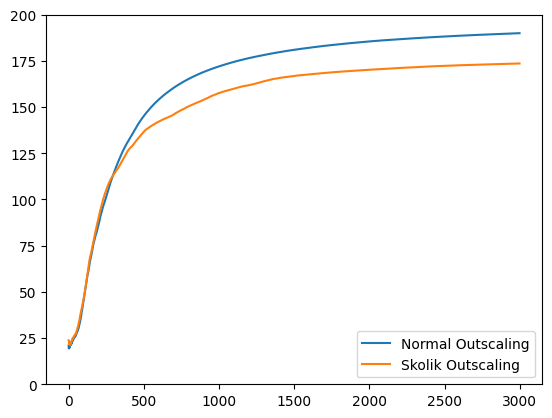

In [5]:
plt.plot(normal_outscaling_models_average_reward, label = "Normal Outscaling")
plt.plot(skolik_outscaling_models_average_reward, label = "Skolik Outscaling")
#I want the y scale to be between 0 and 200
plt.ylim(0,200)
plt.legend()
plt.show()

As we can clearly see, the normal outscaling performs better than the skolik outscaling. Consequently, every test from now onwards will be performed using the normal outscaling.

## 1.3) Analysis of the final weights of both outscaling types

In [6]:
normal_outscaling_final_weights = [normal_outscaling_models[i]["weights"] for i in range(10)]
skolik_outscaling_final_weights = [skolik_outscaling_models[i]["weights"] for i in range(10)]

In [7]:
# Let's just look at the outscaling weights for the two types of outscaling models
normal_outscaling_weights = [normal_outscaling_final_weights[i][2] for i in range(10)]
skolik_outscaling_weights = [skolik_outscaling_final_weights[i][2] for i in range(10)]

In [8]:
normal_outscaling_weights

[array([[-119.97882 ,  119.993225]], dtype=float32),
 array([[139.42749, 135.21881]], dtype=float32),
 array([[-138.64876,  140.28806]], dtype=float32),
 array([[-131.9564 , -127.34062]], dtype=float32),
 array([[180.33583, 161.58366]], dtype=float32),
 array([[-167.1782 ,  159.95065]], dtype=float32),
 array([[ 167.45613, -156.09618]], dtype=float32),
 array([[173.92769, 174.68073]], dtype=float32),
 array([[-182.62727, -179.01616]], dtype=float32),
 array([[ 168.64595, -166.1589 ]], dtype=float32)]

In [9]:
skolik_outscaling_weights

[array([[153.70392, 158.35461]], dtype=float32),
 array([[111.331985, 110.96117 ]], dtype=float32),
 array([[121.5845 , 114.15854]], dtype=float32),
 array([[141.91441, 143.12415]], dtype=float32),
 array([[161.814  , 149.31485]], dtype=float32),
 array([[164.88115, 170.09598]], dtype=float32),
 array([[134.81165, 136.13678]], dtype=float32),
 array([[142.89603, 144.30255]], dtype=float32),
 array([[116.0152 , 115.78096]], dtype=float32),
 array([[274.27933, 231.63048]], dtype=float32)]

This is really interesting! The outscaling weights of the normal outscaling models sometimes are both positive, other times one is positive and the other is negative, and other times both are negative. However, their magnitude is usually similar. On the other hand, the outscaling weights of the skolik outscaling models are always both positive and have a similar magnitude. What does this mean and why does this lead to a better performance for the normal outscaling models?

In [10]:
normal_outscaling_models[0].keys()

dict_keys(['episode_reward_history', 'gradients', 'loss_array', 'q_values_array', 'weights'])

In [11]:
normal_outscaling_models[0]["q_values_array"]

[array([[-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ],
        [-0.10323876, -0.3611502 ]], dtype=float32),
 array([[-0.16141377, -0.30361858],
        [-0.08887684, -0.36005628],
        [-0.08887684, -0.36005628],
        [-0.08887684, -0.36005628],
        [-0.16141377, -0.30361858],
        [-0.16141377, -0.30361858],
        [-0.08887684, -0.36005628],
        [-0.08887684, -0.36005628],
        [-0.16141377, -0.30361858],
        [-0.16141377, -0.30361858],
        [-0.08887684, -0.36005628],
        [-0

As you can see, both of the last Q-values are positive, even though the final outscaling weights have opposite signs. This confirms that, even though they have opposite signs, the Q-values originated are always both positive, as they should be. However, why does this lead to a better performance for the normal outscaling models?

## 1.4) Analysis of the number of times each action was taken

In [12]:
q_values_normal = [normal_outscaling_models[i]["q_values_array"] for i in range(10)]
q_values_skolik = [skolik_outscaling_models[i]["q_values_array"] for i in range(10)]

In [13]:
len_qvalues_normal = [len(q_values_normal[i]) for i in range(10)]
len_qvalues_skolik = [len(q_values_skolik[i]) for i in range(10)]

min_len_qvalues_normal = min(len_qvalues_normal)
min_len_qvalues_skolik = min(len_qvalues_skolik)
min_len_overall = min(min_len_qvalues_normal, min_len_qvalues_skolik)

action_0_count_normal = 0
action_1_count_normal = 0
action_0_count_skolik = 0
action_1_count_skolik = 0

for i in range(10):
    for j in range(min_len_overall):
        for k in range(16):
            if (q_values_normal[i][j][k][0] > q_values_normal[i][j][k][1]):
                action_0_count_normal += 1
            elif (q_values_normal[i][j][k][0] < q_values_normal[i][j][k][1]):
                action_1_count_normal += 1
            if (q_values_skolik[i][j][k][0] > q_values_skolik[i][j][k][1]):
                action_0_count_skolik += 1
            elif (q_values_skolik[i][j][k][0] < q_values_skolik[i][j][k][1]):
                action_1_count_skolik += 1

In [14]:
print(f"The number of times action 0 was chosen for V0 is {action_0_count_normal} and the number of times action 1 was chosen is {action_1_count_normal}")
print(f"The number of times action 0 was chosen for V2 is {action_0_count_skolik} and the number of times action 1 was chosen is {action_1_count_skolik}")

The number of times action 0 was chosen for V0 is 1419152 and the number of times action 1 was chosen is 1328840
The number of times action 0 was chosen for V2 is 1416415 and the number of times action 1 was chosen is 1331573


In [15]:
#Now I want the percentages of times each action was chosen
print("Action 0 was chosen {}% of the time for normal outscaling".format(action_0_count_normal/(action_0_count_normal + action_1_count_normal)*100))
print("Action 0 was chosen {}% of the time for skolik outscaling".format(action_0_count_skolik/(action_0_count_skolik + action_1_count_skolik)*100))

Action 0 was chosen 51.64323622485073% of the time for normal outscaling
Action 0 was chosen 51.543711253469816% of the time for skolik outscaling
